<div id="top"></div>
<table>
    <tr><td style="text-align: center;"><a href="#1" style="text-decoration: none; color: black;">1. 확률</a></td>
    </tr>
    <tr><td style="text-align: center;"><a href="#2" style="text-decoration: none; color: black;">2. 베이즈 정리</a></td></tr>
    <tr><td style="text-align: center;"><a href="#3" style="text-decoration: none; color: black;">3. 연속 분포</a></td></tr>
    <tr><td style="text-align: center;"><a href="#4" style="text-decoration: none; color: black;">4. 정규 분포</a></td></tr>
</table>

## <div id="1"><a href="#top" style="text-decoration: none; color: black;">1. 확률</a></div>

In [1]:
# pip install pandas

In [2]:
import pandas as pd

# General Social Survey(GSS)데이터 셋을 읽고 데이터프레임(DataFrame)에 저장
gss = pd.read_csv('gss_bayes.csv', index_col=0)
gss.head()

,year,age,sex,polviews,partyid,indus10
caseid,,,,,,
1,1974,21.0,1,4.0,2.0,4970.0
2,1974,41.0,1,5.0,0.0,9160.0
5,1974,58.0,2,6.0,1.0,2670.0
6,1974,30.0,1,5.0,4.0,6870.0
7,1974,48.0,1,5.0,4.0,7860.0


gss_bayes.csv
- caseid: 응답자의 ID(테이블의 인덱스)
- year: 설문 연도
- age: 응답자의 설문 당시 나이
- sex: 성별
- polviews: 진보부터 보수까지의 범위 내에서의 정치적 성향
- partyid: 정당 소속, 민주당, 공화당, 혹은 무소속
- Indus10: 응답자가 일하는 산업 분야

In [3]:
banker = (gss['indus10'] == 6870) # 6870: '은행 및 관련 분야' 코드
print(banker.head())

print('==========☆==========') # (True: 1, False: 0)
print('banker.sum():', banker.sum()) # 은행원의 합

# 전체 응답자 중 한 명을 뽑았을 때 은행원일 확률: 1.5%
print('banker.mean():', banker.mean()) # 은행원의 비율

caseid
1    False
2    False
5    False
6     True
7    False
Name: indus10, dtype: bool
==========☆==========
banker.sum(): 728
banker.mean(): 0.014769730168391155


In [4]:
# 주어진 A의 비율을 구하는 함수
def prob(A):
    return A.mean()

prob(banker)

0.014769730168391155

In [5]:
female = (gss['sex'] == 2)
print(prob(female)) # 여성 응답자의 비율

liberal = (gss['polviews'] <= 3)
print(prob(liberal)) # 진보 성향인 비율

democrat = (gss['partyid'] <= 1)
print(prob(democrat)) # 적극적 민주당원 or 보통 민주당원 성향인 비율

0.5378575776019476
0.27374721038750255
0.3662609048488537


#### 논리곱(conjunction) == AND 논리 연산자
<blockquote>A와 B 모두 참 => 참</blockquote>
하나라도 거짓 => 거짓

In [6]:
print('은행원일 확율:', prob(banker))
print('은행원이며 민주당일 확율:', prob(banker & democrat))

은행원일 확율: 0.014769730168391155
은행원이며 민주당일 확율: 0.004686548995739501


### 조건부 확률 (conditional probability)
어떤 사건이 주어졌을 때, 그 다음에 나올 확률을 결정할 때 사용함. <br>
빨간색 카드를 선택한 경우, 카드를 들고 있을 때 3개의 다이아몬드를 고른 경우의 확률은?
$$ P(3D) = \frac{1}{52} $$
$$ P(R) = \frac{26}{52} = \frac{1}{2} $$

빨간 카드를 가지고 있다고 했을 때 다이아몬드 3을 선택할 확률은? 
$$ P(3D | R) = \frac{\frac{1}{52}}{\frac{1}{2}} = \frac{1}{26} $$

2개의 사건(A, B)에 대한 공식적인 수식의 정의는
$$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$
$$ P(A \cap B) = P(B) P(A|B) $$
$$ P(A) P(B|A) = P(B) P(A|B) $$
$$ P(A|B) = \frac{P(A) P(B|A)}{P(B)} $$

베이즈 이론은 아래와 같이 분할 가능
- P(A) = prior(사전 확률), 우리가 데이터를 관측하기 전에 미리 알고 있다고 믿는 확률.
    - 이것은 이런 사건의 marginal 확률(개별 사건의 확률, 주변 확률)
- P(B) = 우리가 보유하고 있는 데이터 / event를 관측한 확률. 
    - 이것은 이런 사건의 marginal 확률, 특히 정규화 상수라 함.
- P(B|A)는 likelihood로 알려진 우리가 믿고 있는 것이 주어졌다고 생각하는 확률. 
    - 실제는 확률이 아님.
- P(A|B)는 우리가 데이터를 관측한 후의 우리의 믿음(belief)의 확률이고. 
    - posterior(사후 확률)

=> 베이즈 이론은 아래와 같이 분할 가능
- $P(\theta)$ = prior(사전 확률), 우리가 데이터를 관측하기 전에 미리 알고 있다고 믿는 확률.
    - 이것은 이런 사건의 marginal 확률
- $P(B)$ = 우리가 보유하고 있는 데이터 / event를 관측한 확률. 
    - 이것은 이런 사건의 marginal 확률, 특히 정규화 상수라 함.
- $ P(x|\theta) $는 likelihood로 알려진 우리가 믿고 있는 것이 주어졌다고 생각하는 확률. 
    - 실제는 확률이 아님.
- $ P(\theta|x) $는 우리가 데이터를 관측한 후의 우리의 믿음(belief)의 확률이고. 
    - posterior(사후 확률)

In [7]:
selected = female[banker]
print(prob(selected)) # 은행원 중 여성일 확률

def conditional(proposition, given):
    return prob(proposition[given])
conditional(female, banker)

0.7706043956043956


0.7706043956043956

In [8]:
# 논리곱은 교환 가능, 조건부확률은 교환 불가능
print( prob(banker & democrat) == prob(democrat & banker) )
print( conditional(female, banker) == conditional(banker, female) )

True
False


In [9]:
# 은행원 중 진보 성향인 여성의 비율
conditional(liberal & female, banker)

0.17307692307692307

명제 A에 대한 확률: $ P(A) $ <br>
A와 B 모두 참일 확률: $ P(A and B) = P(A \cap B) $ <br>
B가 주어졌을 때 A가 참일 확률: $ P(A|B) $

#### 확률 법칙

정리1: $$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$

---
정리2: $$ P(A \cap B) = P(B)P(A|B) $$

--- 
정리3: 
$$ P(A \cap B) = P(B \cap A) $$

$$ P(B)P(A|B) = P(A)P(B|A) $$

$$ P(A|B) = \frac{P(A)P(B|A)}{P(B)} => 베이즈 정리 $$ 

---
+전체확률의 법칙:
$$ P(A) = P(B_{1} \cap A) + P(B_{2} \cap A) $$
$$ P(A) = P(B_{1})P(A|B_{1}) + P(B_{2})P(A|B_{2}) = \sum_{i=1} P(A \cap B_{i}) =  \sum_{i=1} P(B_{i}) P(A|B_{i}) $$

In [10]:
# 전체확률의 법칙 1
female = (gss['sex'] == 2)
male = (gss['sex'] == 1)

print(prob(banker))
print(prob(male & banker) + prob(female & banker))

# 전체확률의 법칙 2
prob(male)*conditional(banker, male) + prob(female)*conditional(banker, female)

0.014769730168391155
0.014769730168391155


0.014769730168391153

### 예제
2쌍의 카드를 가지고 있다. <br>
하나는 <u>정상 deck_1(D_1)</u>이고 다른 하나는 <u>빨간색 카드(다이아몬드와 하트)를 가지고 있는 deck_2(D_2)</u>. <br>
랜덤으로 하나의 deck를 선택하고 다이아몬드 3이 나오는 경우(3D), <br>
다이아몬드 3이 정상 deck_1(D_1)으로부터 나오는 확률은?

우선 랜덤으로 deck_1, deck_2, 중에서 하나를 선택하면 <br>
deck_1이 선택될 확률: $ P(D_{1}) = \frac{1}{2} $ <br>
deck_2이 선택될 확률: $ P(D_{2}) = \frac{1}{2} $

- likelihood 계산

$ P(3D | D_{1}) = \frac{1}{52} $ <br>
$ P(3D | D_{2}) = \frac{1}{26} $

두번째 deck에서만 빨간색 카드인 26개의 카드가 있고, 그 26개 중 하나의 3의 다이아몬드를 선택하는 확률 <br>
전체 확률 법칙을 적용하여 다이아몬드 3을 관측할 수 있는 확률?
$$ P(3D) = P(D_{1}) P(3D | D_{1}) + P(D_{2}) P(3D | D_{2}) = \frac{3}{104} $$

## 문제
베이지안 이론을 사용하여 아래의 수식을 전개하세요. 
1번 deck로부터 다이아몬드 3이 나오는 확률은?

$$ P(D_{1} | 3D) = \frac{P(D_{1}) P(3D|D_{1})}{3D} = \frac{1}{3} $$

## <div id="2"><a href="#top" style="text-decoration: none; color: black;">2. 베이즈 정리</a></div>

<blockquote>베이즈 정리: $ P(A|B) = \frac{P(A)P(B|A)}{P(B)} $</blockquote>

- [ 쿠키 ]
    - 그릇1: 바닐라 쿠키 30개와 초콜릿 쿠키 10개
    - 그릇2: 바닐라 쿠키 20개와 초콜릿 쿠키 20개
        - 임의의 그릇을 하나 골라 쿠키 하나를 집었다. 그 때 그 쿠키가 바닐라 쿠키였다면, 이 쿠키가 1번 그릇에서 나왔을 확률은?
1) 전제- 바닐라 쿠키를 꺼냈다 + 그릇 1에서 나온 것. 조건부확률: $ P(B_{1}|V) $
    - 그릇1이라는 조건 하, 바닐라 쿠키 조건부확률: $ P(V|B_{1}) $
    - 그릇2이라는 조건 하, 바닐라 쿠키 조건부확률: $ P(V|B_{2}) $
    
$$ P(B_{1}|V) = \frac{P(B_{1})P(V|B_{1})}{P(V)} <= 구하고자 하는 값 $$
- $ P(B_{1}) $: 그릇1을 골랐을 확률 = $ \frac{1}{2} $
- $ P(V|B_{1}) $: 그릇1에서 바닐라 쿠키를 고를 확률 = $ \frac{3}{4} $
- $ P(V) $: 각 그릇에서 바닐라 쿠키를 고를 확률 => 전체 확률의 법칙 이용
    - $ P(V) = P(B_{1})P(V|A) + P(B_{2})P(V|B_{2}) $
    - $ P(V) = (\frac{1}{2})(\frac{3}{4}) +  (\frac{1}{2})(\frac{1}{2}) = \frac{5}{8} $
$$ P(B_{1}|V) = \frac{(\frac{1}{2})(\frac{3}{4})}{(\frac{5}{8})} = \frac{3}{5} $$

#### 2-1. 베이즈 갱신(Bayesian Update)
통시적(시간에 따라 변한다) 베이즈: 데이터 일부 D가 주어졌을 때, 가설 H의 확률을 갱신하는 방법으로 사용하는 것.<br><sub> 새로운 데이터를 접하게 되면 가설의 확률이 변한다는 것</sub>
$$ P(H|D) = \frac{P(H)P(D|H)}{P(D)} $$
- $ P(H) $: 사전확률, 데이터를 확인하기 전에 구한 가설 확률. 
- $ P(H|D) $: 사후확률, 데이터를 확인한 후의 가설 확률. 
- $ P(D|H) $: 기능도(우도), 가설 하에서 해당 데이터가 나올 확률. 
- $ P(D) $: 데이터의 전체확률, 어떤 가설에서든 해당 데이터가 나올 확률.
    -  $ P(D) = P(H_{1})P(D|H_{1}) + P(H_{2})P(D|H_{2}) = \sum_{i} P(H_{i}) P(D|H_{i}) $
    
<div style="text-align: center;">데이터와 사전 확률을 사용해서 사후확률을 구하는 과정 => 베이즈 갱신</div>



#### 2-2. 베이즈 테이블: 베이즈 갱신을 보다 편리하게 할 수 있는 도구


In [11]:
import pandas as pd

# 한 행에 하나의 가설이 들어갈 빈 데이터프레임 생성
table = pd.DataFrame(index=['Bowl 1', 'Bowl 2'])

# 사전확률을 나타내는 열 추가
table['prior'] = 1/2, 1/2
# 가능도에 대한 열 추가
table['likelihood'] = 3/4, 1/2
# 표준화되지 않은 사후확률 = 사전확률 X 가능도
table['unnorm'] = table['prior'] * table['likelihood']
# 전체확률
prob_data = table['unnorm'].sum()
# 사후확률
table['posterior'] = table['unnorm'] / prob_data # 표준화(normalization)

print(prob_data)
print(table['posterior'].sum()) # 표준화 상수(normalizing constant)
table

0.625
1.0


,prior,likelihood,unnorm,posterior
Bowl 1,0.5,0.75,0.375,0.6
Bowl 2,0.5,0.50,0.250,0.4


#### 3. 분포
분포(distribution): 가능한 결괏값과 각 값에 대한 확률의 집합. <br>
- 경험적(empirical) 분포: 데이터에 기반한 개념 (<=> 이론적 분포)

### 확률질량함수(probability mass funtion, PMF)
분포 결과가 이산적인 경우 이 분포를 확률질량함수로 나타낼 수 있다.

In [12]:
# pip install empiricaldist
# pip install matplotlib
# pip install scipy

In [13]:
# Pmf: 각 가능한 결괏값에 각각의 확률을 연결해주는 함수
from empiricaldist import Pmf

coin = Pmf() # Pmf(): 어떤 결괏값도 들어있지 않은 빈 Pmf 객체를 생성.
coin['heads'] = 1/2 # 동전 앞면
coin['tails'] = 1/2 # 동전 뒷면
coin

,probs
heads,0.5
tails,0.5


In [14]:
# 육면체 주사위의 확률값
die = Pmf.from_seq([1, 2, 3, 4, 5, 6])
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [15]:
# 글자수의 비중
letters = Pmf.from_seq(list('Mississippi'))
letters

,probs
M,0.090909
i,0.363636
p,0.181818
s,0.363636


In [16]:
letters['s'], die([1, 4, 7])

(0.36363636363636365, array([0.16666667, 0.16666667, 0.        ]))

## <div id="3"><a href="#top" style="text-decoration: none; color: black;">3. 연속 분포</a></div>
- 이산형 분포(discrete distribution): 각각의 결과에 확률을 계산(ex. 동전 던지기).
    - 확률질량함수
- 연속 분포(continuous distribution): 연속적인 결과에 대한 분포. 
    - 균등 분포(uniform distribution): 0과 1 사이의 모든 값에 동등한 비중을 준 분포. 
        - 확률밀도함수(probability density function, PDF): 밀도함수를 특정 구간에서 적분한 값으로 확률을 나타냄.
        - 누적분포함수(cumulative distribution function, CDF): 확률변수의 값이 특정 값보다 작거나 클 확률을 나타냄. 
        
> 확률질량함수 : 이산확률변수의 확률함수 <br>
> 확률밀도함수 : 연속확률변수의 확률함수

In [30]:
# 확률밀도함수(pdf)
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

# 누적분포함수(cdf)
def uniform_cdf(x):
    "균등분포를 따르는 확률변수의 값이 x보다 작거나 같을 확률을 반환"
    if x < 0: return 0 # 균등분포의 확률은 절대로 0보다 작을 수 없음
    elif x < 1: return x # 예시: P(X <= 0.4) = 0.4
    else: return 1 # 균등분포의 확률은 1보다 작음

print('PDF: ', uniform_pdf(-0.2), uniform_pdf(0))
print('CDF: ', uniform_cdf(-2), uniform_cdf(0.4), uniform_cdf(3))

PDF:  0 1
CDF:  0 0.4 1


## <div id="4"><a href="#top" style="text-decoration: none; color: black;">4. 정규분포(Normal distribution)</a></div><small>모든 분포들의 왕, 유명한 종형 곡선 모양의 분포. 가우스 분포<br>연속 확률분포의 한 종류로서 데이터의 분포를 근사하는데 가장 흔하게 사용됨.</small>
- 두 파라미터로 정의됨.
    - 평균 = $ \mu(뮤) $ :  종의 중심이 어디인가.
    - 표준편차 = $ \sigma(시그마) $ :  종의 폭이 얼마나 넓은가
    
정규분포의 밀도함수: 
$$ f(x | \mu, \sigma)  = \frac{1}{\sqrt{2\pi\sigma}} exp \bigr( \frac{(x-\mu)^2}{2\sigma^2}\bigr) $$

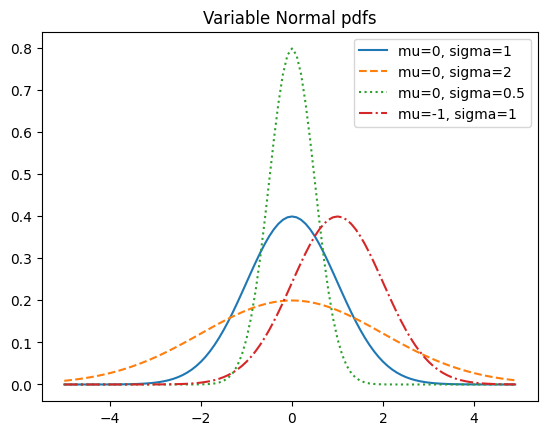

In [41]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(-x-mu)**2 / 2 / sigma**2) / (sqrt_two_pi * sigma))

import matplotlib.pyplot as plt
import math

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1') # ???
plt.legend()
plt.title('Variable Normal pdfs')
plt.show()

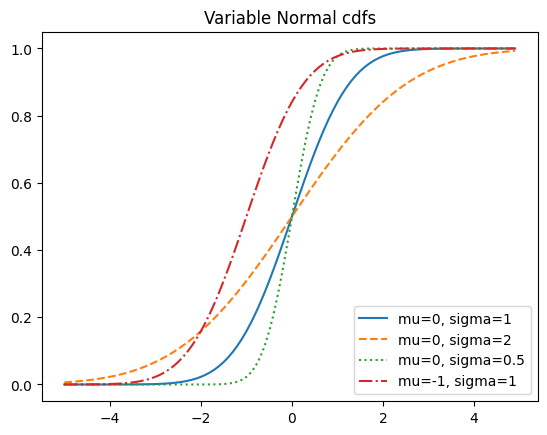

In [49]:
# 정규분포의 누적분포함수
def normal_cdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

import matplotlib.pyplot as plt
import math

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1') # ???
plt.legend(loc=4)
plt.title('Variable Normal cdfs')
plt.show()